In [1]:
%load_ext autoreload
%autoreload 2

# Importing libraries and modules

In [321]:
from os import sys
sys.path.append("/datasci_tools/datasci_tools/")
sys.path.append("../../../graph_tools/")
sys.path.append("/machine_learning_tools/machine_learning_tools/")

In [193]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# from datasci_tools
import networkx_utils as xu
import numpy_utils as nu

# from the graph_tools
import graph_visualizations as gviz
import graph_statistics as gs

# Problem 1.1: Basic Graph Theory

### 1.1.1 Triangles and algebraic Representation

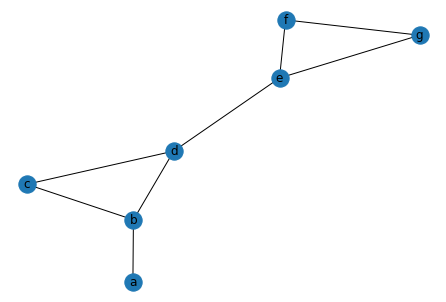

In [6]:
nodes = ['a','b','c','d','e','f','g']
edgelist = [
    ['a','b'],
    ['b','c'],
    ['b','d'],
    ['c','d'],
    ['d','e'],
    ['e','f'],
    ['e','g'],
    ['f','g'],
]

G = nx.from_edgelist(edgelist)
nx.draw(G,with_labels = True)

#### -- a) Find two adjacency matricies

In [28]:
# -- the mapping functions l: V --> N
node_to_idx_1 = {k:i%len(nodes) + 1 for i,k in enumerate(nodes)}
node_to_idx_2 = {k:(i+1)%len(nodes) + 1 for i,k in enumerate(nodes)}

In [30]:
def node_order_from_mapping(node_map):
    idx = np.sort(list(node_map.values())).astype('int')
    reverse_map = {v:k for k,v in node_map.items()}
    return [reverse_map[k] for k in idx]

adj_1 = nx.adjacency_matrix(
    G,nodelist = node_order_from_mapping(node_to_idx_1)
)

print(f"Adjacency Matrix 1:")
print(f"node_to_idx_1 = {node_to_idx_1}")
print(f"\n{repr(adj_1.toarray())}")

adj_2 = nx.adjacency_matrix(
    G,nodelist = node_order_from_mapping(node_to_idx_2)
)

print(f"Adjacency Matrix 2:")
print(f"node_to_idx_2 = {node_to_idx_2}")
print(f"\n{repr(adj_2.toarray())}")

Adjacency Matrix 1:
node_to_idx_1 = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7}

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0]])
Adjacency Matrix 2:
node_to_idx_2 = {'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 1}

array([[0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0]])


In [35]:
P = np.roll(np.eye(*adj_1.shape),-1,axis = 1)
print(f"P (Permutation matrix):\n{repr(P)}")

P (Permutation matrix):
array([[0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])


In [36]:
# verifying that adj_2 is the same as perumuting adj_1
A = adj_1
A_prime = P@A@(P.T)
A_prime

array([[0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0.]])

In [44]:
def n_triangles(M):
    return (np.trace(M@M@M)/6).astype('int')

print(f"# of triangles in adj_1 = {n_triangles(adj_1.toarray())}")
print(f"# of triangles in adj_2 = {n_triangles(adj_2.toarray())}")

# of triangles in adj_1 = 2
# of triangles in adj_2 = 2


### 1.1.2 Vectors and Matrices

In [55]:
node_order_from_mapping(node_to_idx_1)

['a', 'b', 'c', 'd', 'e', 'f', 'g']

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1]])

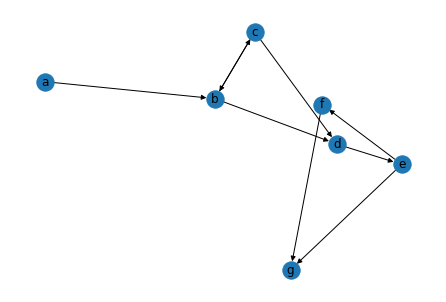

In [68]:
G_dir = nx.DiGraph()
G_dir.add_edges_from(edgelist + [['g','g'],['c','b']])
A = nx.adjacency_matrix(G_dir,nodelist = node_order_from_mapping(node_to_idx_1)).toarray()
nx.draw(G_dir,with_labels = True)
A

In [66]:
din = A.T@np.ones((len(A),1))
dout = A@np.ones((len(A),1))
print(f"din = {din.T}")
print(f"dout = {dout.T}")


din = [[0. 1. 1. 2. 1. 1. 3.]]
dout = [[1. 2. 1. 1. 2. 1. 1.]]


#### b) Number of self loops

In [70]:
np.trace(A)

1

#### c) Number of mutual edges

In [69]:
np.trace(A@A)/2

1.5

# d) Local Clustering Coefficient

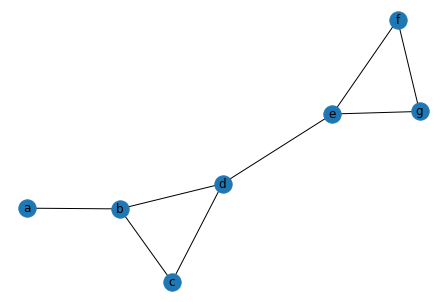

In [79]:
nx.draw(G,with_labels = True)

In [77]:
A = adj_1.toarray()

def local_clustering_coeff_vector(M):
    ones_vec = np.ones((len(M),1))
    return ((1/6)*np.trace(M@M@M))/((M@ones_vec)*((M@ones_vec) - 1))

local_clustering_coeff_vector(A)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


array([[       inf],
       [0.33333333],
       [1.        ],
       [0.33333333],
       [0.33333333],
       [1.        ],
       [1.        ]])

### 1.1.3 Star Network

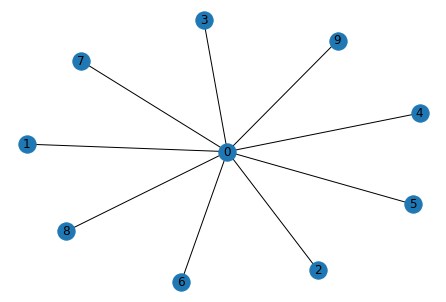

In [90]:
N = 9
S = nx.star_graph(N)
nx.draw(S,with_labels = True)

#### a) degree distribution as pmf

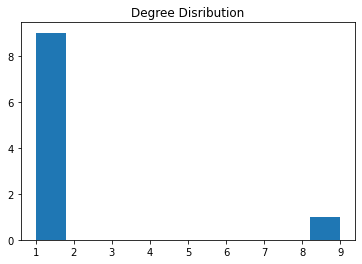

In [92]:
gviz.plot_degree_distribution_simple(S)

#### b) Expected value of degree distribution

In [91]:
np.mean(gs.degree_distribution(S))

1.8

#### c) Global Clustering coefficient

In [93]:
gs.transitivity(S)

0

# Problem 2: Centrality

## 1.2.2 Path betweeness

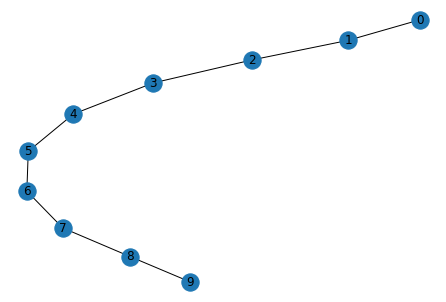

In [100]:
N = 10
G = nx.path_graph(N)
nx.draw(G,with_labels = True)

In [103]:
gs.betweenness_centrality(
    G,
    normalized=False,
    endpoints = False
)

{0: 0.0,
 1: 8.0,
 2: 14.0,
 3: 18.0,
 4: 20.0,
 5: 20.0,
 6: 18.0,
 7: 14.0,
 8: 8.0,
 9: 0.0}

In [111]:
def betweeness_centrality_manual(i):
    return (i-1)*(N-i)

betweeness_centrality_manual(4)

18

## 1.2.3: Regular Centralities

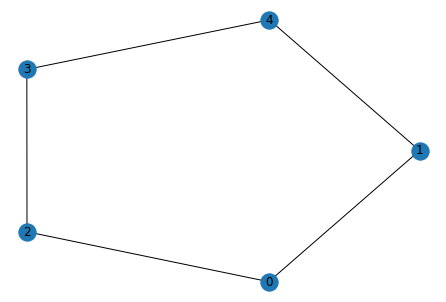

In [117]:
N = 5
k = 2

G = nx.random_regular_graph(k,N)
nx.draw(G,with_labels = True)

In [118]:
gs.eigenvector_centrality(G)

{0: 0.4472135954999579,
 1: 0.4472135954999579,
 4: 0.4472135954999579,
 2: 0.4472135954999579,
 3: 0.4472135954999579}

In [123]:
alpha = 1/(k) - 0.4
print(f"alpha= {alpha}")
nx.katz_centrality(
    G,
    alpha = alpha
)

alpha= 0.09999999999999998


{0: 0.44721359549995787,
 1: 0.44721359549995787,
 4: 0.44721359549995787,
 2: 0.44721359549995787,
 3: 0.44721359549995787}

In [127]:
A = nx.adjacency_matrix(
    G,
).toarray()

I = np.eye(*A.shape)
B = I - alpha*A
B

array([[ 1. , -0.1,  0. , -0.1,  0. ],
       [-0.1,  1. , -0.1,  0. ,  0. ],
       [ 0. , -0.1,  1. ,  0. , -0.1],
       [-0.1,  0. ,  0. ,  1. , -0.1],
       [ 0. ,  0. , -0.1, -0.1,  1. ]])

In [129]:
B_inv = np.linalg.inv(B)
B_inv

array([[1.0206422 , 0.10321101, 0.01146789, 0.10321101, 0.01146789],
       [0.10321101, 1.0206422 , 0.10321101, 0.01146789, 0.01146789],
       [0.01146789, 0.10321101, 1.0206422 , 0.01146789, 0.10321101],
       [0.10321101, 0.01146789, 0.01146789, 1.0206422 , 0.10321101],
       [0.01146789, 0.01146789, 0.10321101, 0.10321101, 1.0206422 ]])

In [130]:
# verifying that the katz centralities are all the same
B_inv @ np.ones((len(B_inv),1))

array([[1.25],
       [1.25],
       [1.25],
       [1.25],
       [1.25]])

## 1.2.3.d: Regular Connected Graph with Different Centralities

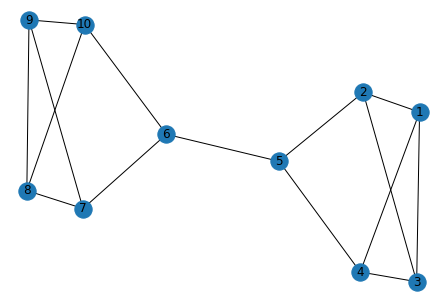

In [132]:
edges = [
    [1,2],
    [1,3],
    [1,4],
    [2,5],
    [2,3],
    [3,4],
    [4,5],
    [5,6],
    [6,7],
    [6,10],
    [7,9],
    [7,8],
    [8,9],
    [8,10],
    [9,10],
]

G = nx.from_edgelist(edges)
nx.draw(G,with_labels = True)

In [135]:
# showing that the betweeness centrality is different
print(f"Degree Distribution: {gs.degree_distribution(G)}")
print(f"Betweenesss Centrality = \n{gs.betweenness_centrality(G)}")

Degree Distribution: [3 3 3 3 3 3 3 3 3 3]
Betweenesss Centrality = 
{1: 0.009259259259259259, 2: 0.16666666666666666, 3: 0.009259259259259259, 4: 0.16666666666666666, 5: 0.5648148148148148, 6: 0.5648148148148148, 7: 0.16666666666666666, 10: 0.16666666666666666, 9: 0.009259259259259259, 8: 0.009259259259259259}


## 1.2.4: Limiting PageRank Values

# --- part a) 

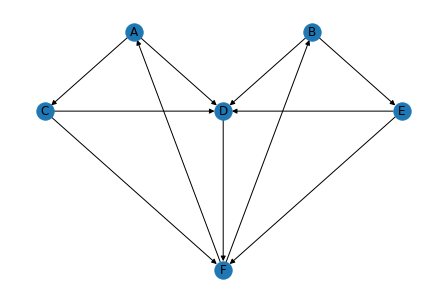

In [157]:
edges = [
    ["A","D"],
    ["A","C"],
    ["B","D"],
    ["B","E"],
    ["C","D"],
    ["C","F"],
    ["D","F"],
    ["E","D"],
    ["E","F"],
    ["F","A",],
    ["F","B"],
]

pos = {
    "A":(-1,1),
    "B":(1,1),
    "C":(-2,0),
    "D":(0,0),
    "E":(2,0),
    "F":(0,-2)
}

G = nx.DiGraph()
G.add_edges_from(edges)
A = nx.adjacency_matrix(
    G,
    nodelist=list(pos.keys())
).toarray()
nx.draw(
    G,
    with_labels = True,
    pos = pos
)

In [173]:
pi = np.array([0.15,0.15,0.10,0.2,0.10,0.3])
ones = np.ones((len(A),1))
Dout_inv = np.diag((A@ones.ravel())**-1)
P = (Dout_inv)@A
P

array([[0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0.5, 0. , 0. , 0. , 0. ]])

In [177]:
print(f"test equilibrium values (pi) = {pi}")
print(f"pi*P = {pi@P}")

test equilibrium values (pi) = [0.15 0.15 0.1  0.2  0.1  0.3 ]
pi*P = [0.15  0.15  0.075 0.25  0.075 0.3  ]


In [178]:
"""
Conclusion: pi is not the equillibrium distribution
"""

array([0.15, 0.15, 0.25, 0.3 , 0.25, 0.15])

### --- part b): solving linear systems of equations---

In [220]:
nu.turn_off_scientific_notation()

X = np.vstack([P.T - np.eye(*P.shape),np.ones((1,len(P)))])
y = np.hstack([np.zeros(len(P)),[1]])
pi_eq = np.linalg.lstsq(X,y)[0].T
print(F"Equilibrium distribution = {pi_eq}")

Equilibrium distribution = [0.15384615 0.15384615 0.07692308 0.23076923 0.07692308 0.30769231]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [221]:
print(f"test equilibrium values (pi_eq) = {pi_eq}")
print(f"pi_eq*P = {pi_eq@P}")

test equilibrium values (pi_eq) = [0.15384615 0.15384615 0.07692308 0.23076923 0.07692308 0.30769231]
pi_eq*P = [0.15384615 0.15384615 0.07692308 0.23076923 0.07692308 0.30769231]


In [227]:
curr_val = pi_eq
for i in range(0,20):
    curr_val = curr_val@P
    
curr_val

array([0.15384615, 0.15384615, 0.07692308, 0.23076923, 0.07692308,
       0.30769231])

# part c) -- showing that matrix is markov and largest eigenvalue

In [223]:
# showing that all rows sum to 1
P@np.ones((len(P),1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [248]:
"""
Purpose: To find the largest eigenvalue
- need to get the left eigenvalues
- need to use .eig because not symmetric
- need to scale so that positive values and sum to one
"""

eigvals,eigvecs = np.linalg.eig(P.T)
#print(f"eigvals = {eigvals}")
idx_max = np.argmax(np.abs(eigvals))
print(f"Largest Eigenvalue = {np.abs(eigvals[idx_max])}")
largest_eigenvector = eigvecs[:,idx_max]

#need to scale so that positive and sum to 1
largest_eigenvector = np.abs(largest_eigenvector/np.sum(largest_eigenvector))
largest_eigenvector

Largest Eigenvalue = 1.0000000000000007


array([0.15384615, 0.15384615, 0.07692308, 0.23076923, 0.07692308,
       0.30769231])

# --- part d) Finding the stationary distribution through iterate process

x_0 = [0.65358959 0.11500694 0.95028286 0.4821914  0.87247454 0.21233268]
Final stationary distribution = [0.15384684 0.15384684 0.07692253 0.23076818 0.07692253 0.30769308]
Converged to stable solution after 99 iterations


Text(0, 0.5, 'Euclidean distance of x and x_prime')

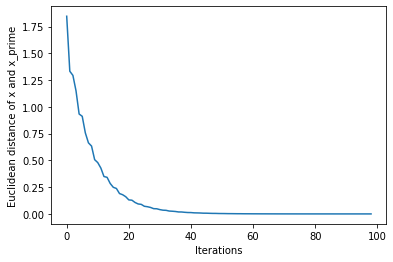

In [255]:
np.random.seed(1000)
x_0 = np.random.rand(*pi.shape)
print(f"x_0 = {x_0}")

counter = 0
x = x_0
epsilon = 0.00001
dists = []

while True: 
    x_prime = x@P
    dist = np.linalg.norm(x - x_prime)
    dists.append(dist)
    if dist < epsilon:
        break
    x = x_prime
    
x = x/np.sum(x)
print(f"Final stationary distribution = {x}")
print(f"Converged to stable solution after {len(dists)} iterations")
plt.plot(np.arange(len(dists)),dists)
plt.xlabel("Iterations")
plt.ylabel("Euclidean distance of x and x_prime")

# Problem 3: Community Detection

### 1.3.1: Modularity and Spectral Clustering

In [316]:
def plot_partition(
    G,
    values,
    nodes=None,
    pos=None,
    class_colors = ("blue","red",),
    ):
    if pos is None:
        pos = nx.spring_layout(G)
    if nodes is None:
        nodes= list(G.nodes())
    
    values= np.array(values).ravel()
    
    # ----------- doing the scalar plotting ----
    print(f"--- Continuous Classification ---")
    vmin = values.min()
    vmin = -1
    vmax = values.max()
    vmax = 1
    cmap = plt.cm.coolwarm
    print(f"values={[np.round(k,4) for k in values]}")
    nx.draw_networkx(
        G, pos=pos, node_color=values,
                 cmap=cmap, vmin=vmin, vmax=vmax, with_labels=False)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    #sm.set_array([])
    cbar = plt.colorbar(sm)
    plt.show()
    
    print(f"--- Binary Classification ---")
    colors = np.array([class_colors[0]]*len(values)).astype('object')
    colors[values >= 0] = class_colors[1]
    #node_colors = {n:c for n,c in zip(nodes,colors)}
    
    nx.draw(
        G,
        node_color = colors,
        pos = pos,
        with_labels = True,
        
    )
    plt.show()
    
def plot_modularity_vs_spectral_partitioning(
    G,
    ):

    nodelist = list(G.nodes())
    pos = nx.spring_layout(
        G,
    )

    L = nx.laplacian_matrix(
        G,
        nodelist=nodelist
    ).toarray()
    B = nx.modularity_matrix(
        G,
        nodelist=nodelist
    )

    print(f"--- Modularity Spectral Clustering ---")
    eigvals,eigvecs = np.linalg.eigh(B)
    print(f"eigvals = {eigvals}")
    B_eigvec = eigvecs[:,-1]

    plot_partition(
        G,
        values = B_eigvec,
        nodes = nodelist,
        pos = pos
    )

    print(f"--- Spectral Clustering ---")
    eigvals,eigvecs = np.linalg.eigh(L)
    print(f"eigvals = {eigvals}")
    L_eigvec = eigvecs[:,1]

    plot_partition(
        G,
        values = L_eigvec,
        nodes = nodelist,
        pos = pos
    )

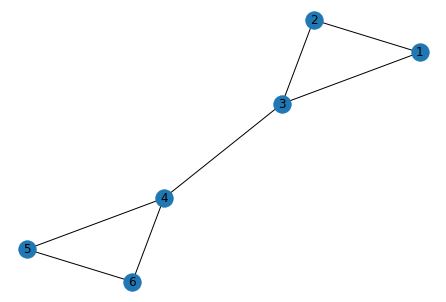

In [319]:
edges = [
    [1,2],
    [1,3],
    [2,3],
    [3,4],
    [4,5],
    [5,6],
    [6,4],
]

G = nx.from_edgelist(edges)
nodelist = list(G.nodes())
pos = nx.spring_layout(
    G,
)
nx.draw(
    G,
    pos = pos,
    with_labels = True
)


--- Modularity Spectral Clustering ---
eigvals = [-1.73205081 -1.         -1.         -0.42857143 -0.          1.73205081]
--- Continuous Classification ---
values=[-0.444, -0.444, -0.3251, 0.3251, 0.444, 0.444]


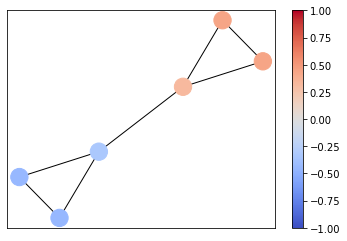

--- Binary Classification ---


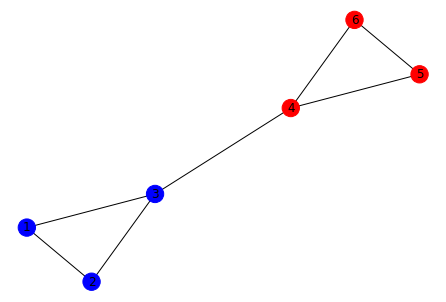

--- Spectral Clustering ---
eigvals = [0.         0.43844719 3.         3.         3.         4.56155281]
--- Continuous Classification ---
values=[0.4647, 0.4647, 0.261, -0.261, -0.4647, -0.4647]


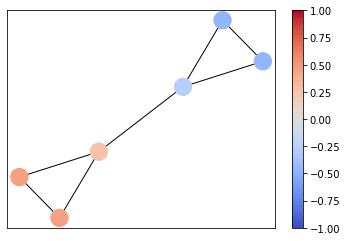

--- Binary Classification ---


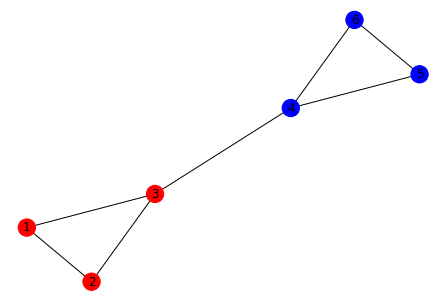

In [318]:
plot_modularity_vs_spectral_partitioning(G)

### b) Provide graph for which partitions are different

--- Modularity Spectral Clustering ---
eigvals = [-1. -1. -1. -1. -1. -1. -1. -1. -1. -0.]
--- Continuous Classification ---
values=[0.3162, 0.3162, 0.3162, 0.3162, 0.3162, 0.3162, 0.3162, 0.3162, 0.3162, 0.3162]


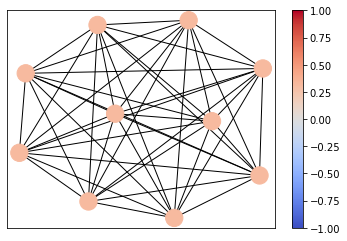

--- Binary Classification ---


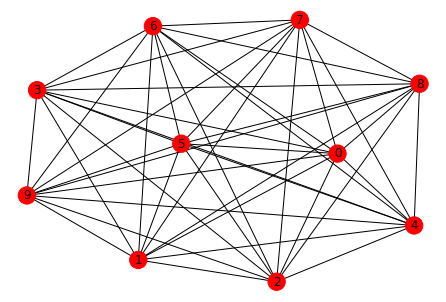

--- Spectral Clustering ---
eigvals = [ 0. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
--- Continuous Classification ---
values=[-0.0, -0.0, 0.0, 0.0038, -0.6621, 0.3833, 0.3833, 0.3833, -0.2458, -0.2458]


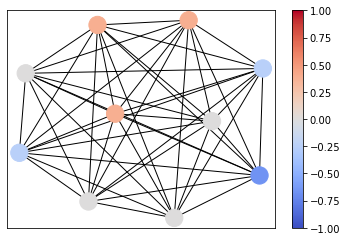

--- Binary Classification ---


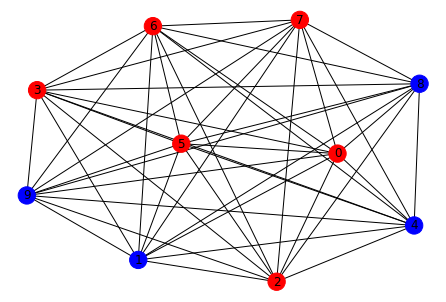

In [320]:
G  = nx.complete_graph(10)
plot_modularity_vs_spectral_partitioning(G)


## 1.3.3: Hierarchical Clustering and the Chaining Effect

In [344]:
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_dendrogram(X,linkage_type):
    """
    Purpose: To plot the dendrogram of certain data

    Code source: 
    https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

    """
    Z = linkage(X, linkage_type)
    # calculate full dendrogram
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram'
             f"\n Linkage Type = {linkage_type}")
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels

    )
    plt.show()
    

#### i) Unperturbed Data

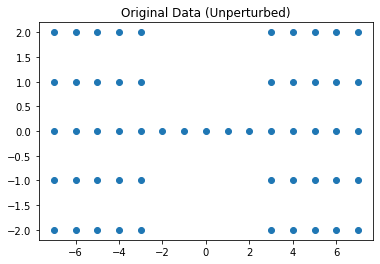

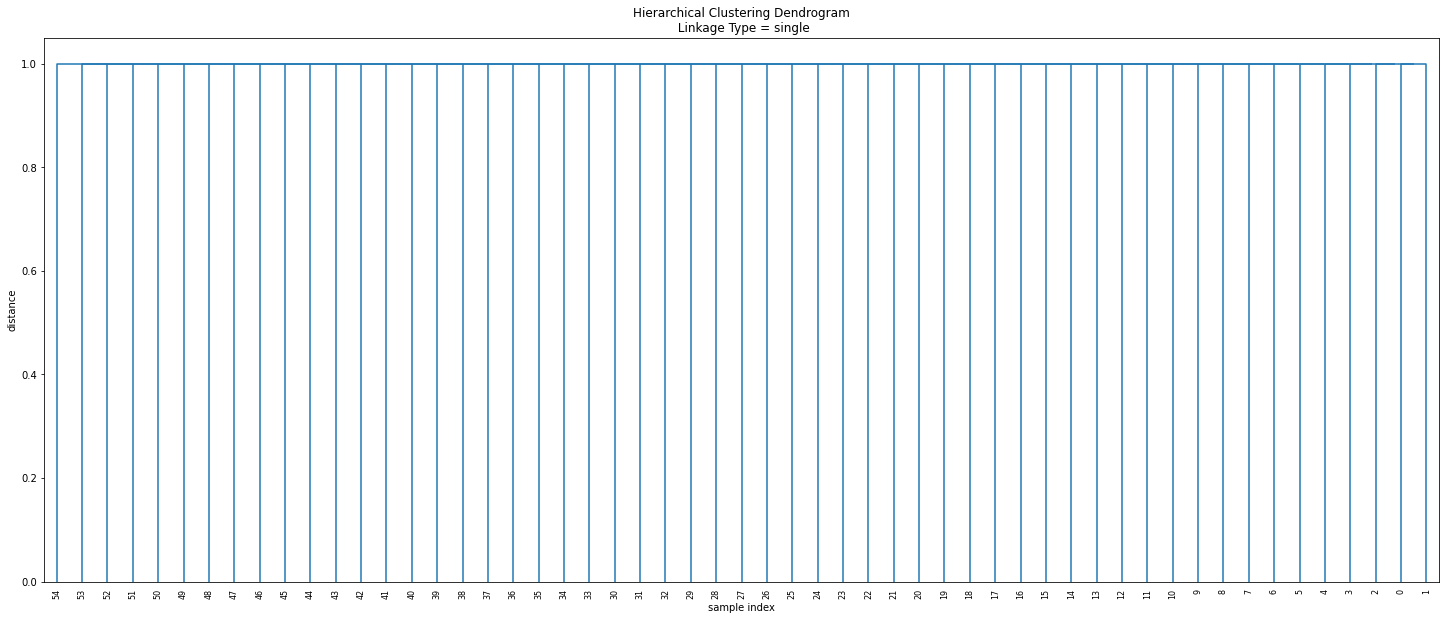

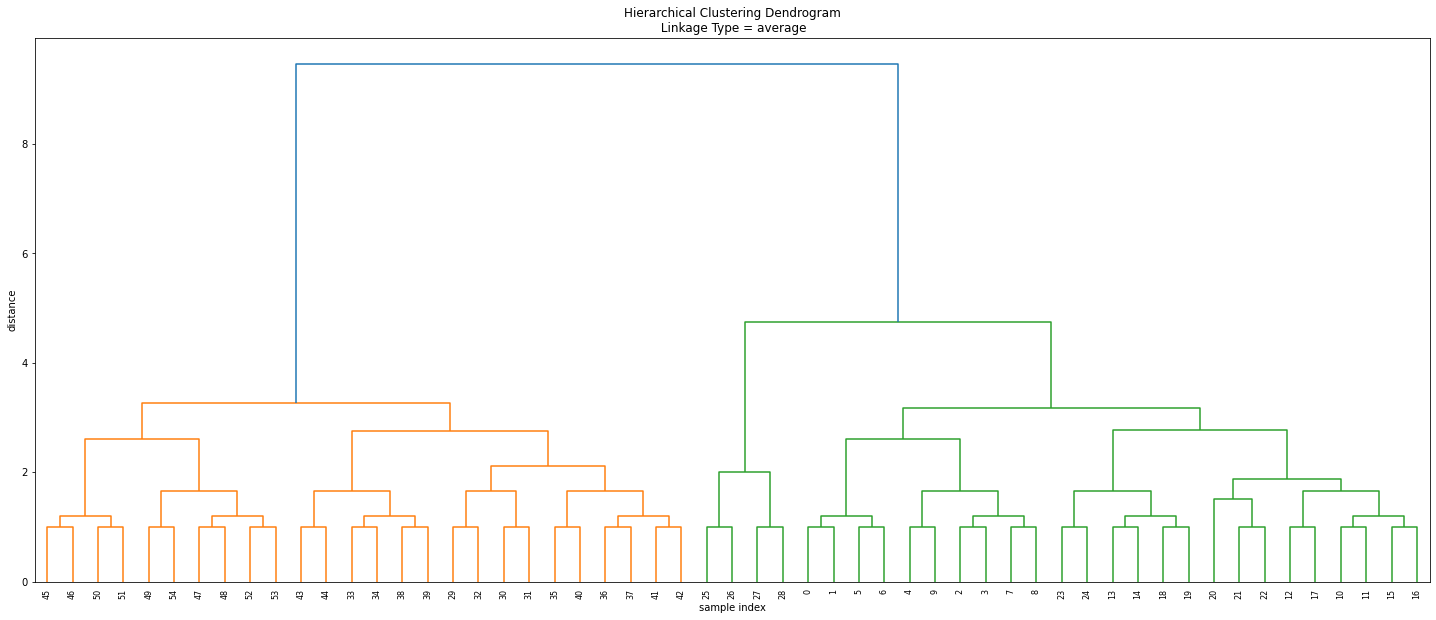

In [346]:
## computing the coordinates of the grid
coordinates = []
for x in np.arange(-7,8):
    for y in np.arange(-2,3):
        if x >= -2 and x <= 2 and y != 0:
            continue
        coordinates.append((x,y))
X= np.array(coordinates)
plt.scatter(X[:,0],X[:,1])
plt.title("Original Data (Unperturbed)")
plt.show()


plot_dendrogram(X,"single")
plot_dendrogram(X,"average")

# Answer to question a)

The single linkage case has the difficulty that every point and every group of points has the same single linkage distance, 
so there is no ordered way to agglomerate the points and agglomeration will either happen without any desired structure captured
(the dendrogram shows all the same height because the distance of the linkage type is all the same). Will just end up adding one
node to the one giant growing group at a time, which is called the chaining effect

#### Perturbed Data

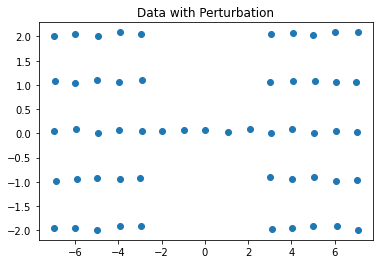

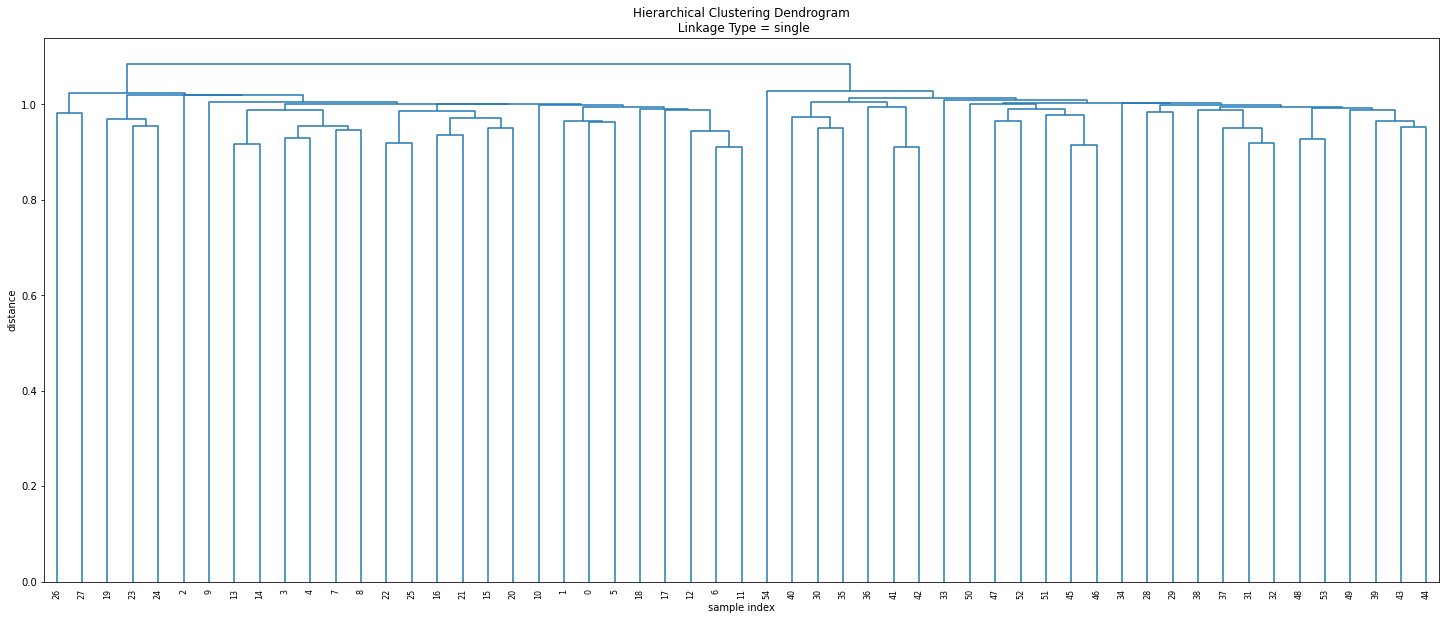

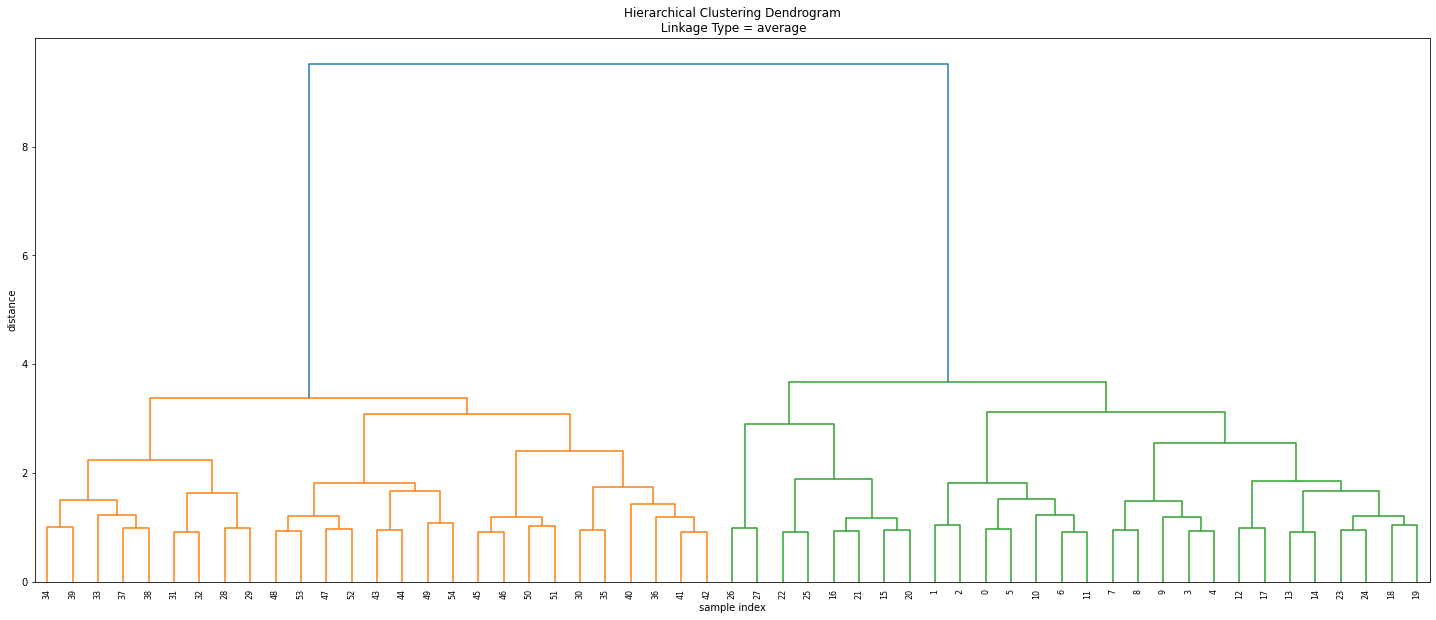

In [351]:
scale = 0.1
X_prime = X + scale*np.random.rand(*X.shape)
plt.scatter(X_prime[:,0],X_prime[:,1])
plt.title("Data with Perturbation")
plt.show()


plot_dendrogram(X_prime,"single")
plot_dendrogram(X_prime,"average")

# Answer to Question B:

Now with the perturbation applied to the dataset we see a little chaining (and the degree to which you see chaining is dependent on the scale of your perturbation).
However, no more are all the single linkage distances the same length but instaead the dendrogram is starting to resemble and capture more 
structure like the average linkage

# --- Problem 4---

In [366]:
import pandas_utils as pu
import pandas as pd
df = pd.read_csv(
    "./primaryschool_csv.csv", sep='\t', lineterminator='\n',header=None)
df[["t","i","j","Ci","Cj"]] = pu.split_str_column_into_multple(df,0,"\t")
df["Cj"] = df["Cj"].str[:-1]
df = pu.delete_columns(df,[0])
df

,t,i,j,Ci,Cj
0,31220,1558,1567,3B,3B
1,31220,1560,1570,3B,3B
2,31220,1567,1574,3B,3B
3,31220,1632,1818,4B,4B
4,31220,1632,1866,4B,4B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


## 1.4.1) Generating the graph

In [369]:
df_with_counts = pd.merge(
    pu.count_unique_column_values(
    df,["i","j"]
    ),
    pu.unique_rows(df,["i","j","Ci","Cj"]),
    on=["i","j"],
    how = "left"
)

df_with_counts

/datasci_tools/datasci_tools/pandas_utils.py:1273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df[count_column] = 1


,i,j,unique_counts,t,Ci,Cj
0,1426,1427,27,36740,5B,5B
1,1426,1428,45,35980,5B,5B
2,1426,1429,75,36680,5B,5B
3,1426,1430,19,35640,5B,5B
4,1426,1431,43,36720,5B,5B
...,...,...,...,...,...,...
8312,1916,1922,38,39780,2A,2A
8313,1917,1919,15,32160,2A,2A
8314,1917,1922,20,119720,2A,2A
8315,1919,1922,9,39120,2A,2A


In [371]:
G = nx.Graph() 
G.add_weighted_edges_from(
    df_with_counts[["i","j","unique_counts"]].to_numpy()
)
xu.print_node_edges_counts(G)

 Graph: # of nodes = 242, # of edges = 8317


### 1.4.2: Descriptive Analysis

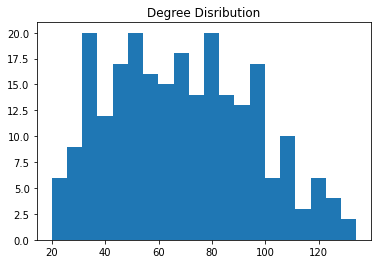

In [373]:
# plot the degree distribution for the network
gviz.plot_degree_distribution_simple(
    G,
    bins = 20
    
)

In [374]:
average_degree = np.mean(gs.degree_distribution(G))
print(f"average_degree = {average_degree}")

average_degree = 68.73553719008264


#### ii) local clustering coefficient

In [384]:
def histogram_from_values(
    values,
    title = None,
    bins = 20,
    ):
    
    plt.hist(values,bins=bins)
    if title is not None:
        plt.title(f"Histogram of {title}")
    plt.show()

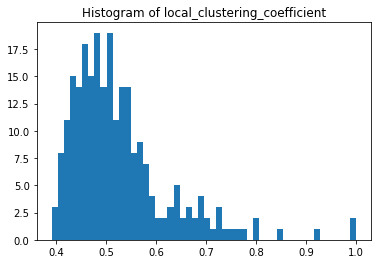

In [385]:
local_cluster_coeff = list(gs.local_clustering_coefficients(G).values())
histogram_from_values(
    local_cluster_coeff,
    title = "local_clustering_coefficient",
    bins = 50,
)

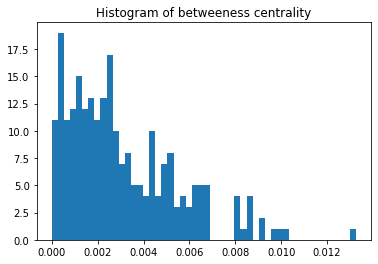

In [386]:
values = list(gs.betweenness_centrality(G).values())
histogram_from_values(
    values,
    title = "betweeness centrality",
    bins = 50,
)

#### 1.43: Plotting the graph

In [402]:
# ---- getting the class labels ---
labels_1 = pu.df_to_dicts(pu.unique_rows(pu.rename_columns(
    df[["i","Ci"]],dict(i="j",Ci="Cj"))
))

labels_2 = pu.df_to_dicts(pu.unique_rows(
    df[["j","Cj"]]
))
all_labels = {}
for j in labels_1 + labels_2:
    all_labels[j['j']] = j['Cj']
                     
import matplotlib_utils as mu
unique_labels = np.unique((list(all_labels.values())))
color_dict = {k:v for k,v in zip(unique_labels,mu.generate_non_randon_named_color_list(len(unique_labels)))}

node_to_color = {n:color_dict[c] for n,c in all_labels.items()}
node_to_color

{'1558': 'black',
 '1560': 'black',
 '1567': 'black',
 '1632': 'midnightblue',
 '1673': 'green',
 '1819': 'midnightblue',
 '1741': 'magenta',
 '1809': 'magenta',
 '1564': 'black',
 '1768': 'blue',
 '1802': 'midnightblue',
 '1503': 'grey',
 '1757': 'blue',
 '1459': 'pink',
 '1617': 'red',
 '1452': 'pink',
 '1468': 'pink',
 '1498': 'pink',
 '1502': 'pink',
 '1643': 'red',
 '1752': 'blue',
 '1761': 'blue',
 '1766': 'blue',
 '1767': 'blue',
 '1774': 'blue',
 '1457': 'pink',
 '1477': 'pink',
 '1479': 'pink',
 '1606': 'red',
 '1613': 'red',
 '1723': 'magenta',
 '1451': 'pink',
 '1458': 'pink',
 '1461': 'pink',
 '1483': 'pink',
 '1493': 'pink',
 '1453': 'pink',
 '1711': 'blue',
 '1805': 'midnightblue',
 '1516': 'pink',
 '1562': 'black',
 '1748': 'magenta',
 '1603': 'red',
 '1501': 'pink',
 '1835': 'midnightblue',
 '1836': 'midnightblue',
 '1831': 'midnightblue',
 '1609': 'red',
 '1439': 'crimson',
 '1698': 'green',
 '1428': 'crimson',
 '1625': 'red',
 '1430': 'crimson',
 '1818': 'midnightblue

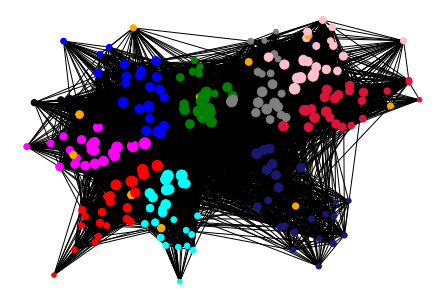

In [406]:
pos = nx.spring_layout(G)
nodes = list(G.nodes())
node_degree = np.array([len(G[n]) for n in nodes])
node_colors = [node_to_color[n] for n in nodes]

nx.draw(
    G,
    nodelist = nodes,
    pos=pos,
    node_size = node_degree,
    node_color = node_colors
)
    